In [2]:
#필요모듈 import
import numpy as np
import pandas as pd
import folium
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#위도  35.16692226307351, 경도는 129.04918307496675 
latitude=35.16692226307351
longitude=129.04918307496675
m=folium.Map(location=[latitude,longitude],zoom_start=17,width=750,height=500)

In [5]:
df = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_부산khy_202206.csv', encoding='cp949')
df.head(3)

상가업소번호    상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명 상권업종소분류코드  \
0  23206623    미광장  NaN         O       숙박       O02  모텔/여관/여인숙    O02A01   
1  20418637  BHC치킨  동래점         Q       음식       Q05     닭/오리요리    Q05A08   
2  24659633    스텔라  NaN         D       소매       D05       의복의류    D05A01   

    상권업종소분류명 표준산업분류코드  ...        건물관리번호    건물명                  도로명주소  \
0  모텔/여관/여인숙   I55112  ...  2.611010e+24    NaN    부산광역시 중구 보수대로44번길 5   
1  후라이드/양념치킨   I56193  ...  2.626010e+24    NaN  부산광역시 동래구 동래로147번길 18   
2       일반의류   G47416  ...  2.650010e+24  비치아파트    부산광역시 수영구 광안해변로 100   

    구우편번호    신우편번호  동정보  층정보  호정보          경도         위도  
0  600074  48974.0  NaN  NaN  NaN  129.023668  35.100979  
1  607020  47802.0  NaN  NaN  NaN  129.087156  35.205267  
2  613751  48305.0  NaN  NaN  NaN  129.115397  35.143770  

[3 rows x 39 columns]

In [6]:
pd.Series(df.columns)

0        상가업소번호
1           상호명
2           지점명
3     상권업종대분류코드
4      상권업종대분류명
5     상권업종중분류코드
6      상권업종중분류명
7     상권업종소분류코드
8      상권업종소분류명
9      표준산업분류코드
10      표준산업분류명
11         시도코드
12          시도명
13        시군구코드
14         시군구명
15        행정동코드
16         행정동명
17        법정동코드
18         법정동명
19         지번코드
20       대지구분코드
21        대지구분명
22        지번본번지
23        지번부번지
24         지번주소
25        도로명코드
26          도로명
27        건물본번지
28        건물부번지
29       건물관리번호
30          건물명
31        도로명주소
32        구우편번호
33        신우편번호
34          동정보
35          층정보
36          호정보
37           경도
38           위도
dtype: object

In [7]:
sub_df = df.loc[df['법정동명'].isin(['부전동', '대연동', '초읍동'])]
sub_df

상가업소번호        상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
7       20698967  비엔에프코퍼레이션  NaN         F    생활서비스       F07     물품기기대여   
14      24035866       대가상회  NaN         D       소매       D01    음/식료품소매   
15      20526716     투썸플레이스  대연점         Q       음식       Q12     커피점/카페   
32      24039492     기능사경정비  NaN         F    생활서비스       F14    자동차/이륜차   
39      23916381       윤이축산  NaN         D       소매       D01    음/식료품소매   
...          ...        ...  ...       ...      ...       ...        ...   
152845  18458173     부산을고치다  NaN         F    생활서비스       F03  개인/가정용품수리   
152855  18457665     조이조이필름  NaN         F    생활서비스       F06         사진   
152857  18436345     씨앗스페이스  NaN         D       소매       D02  선물/팬시/기념품   
152861  18462117       고기극찬  남구점         Q       음식       Q01         한식   
152881  18449693       스카이윌  NaN         R    학문/교육       R04      학원-어학   

       상권업종소분류코드     상권업종소분류명 표준산업분류코드  ...        건물관리번호      건물명  \
7         F07A10       사무기기대여   L69320  ...  2.629010e+24      NaN   
14        D01A13        청과물소매   G47214  ...  2.629010e+24      NaN   
15        Q12A01  커피전문점/카페/다방   I56220  ...  2.629010e+24      NaN   
32        F14A01    자동차정비/카센타      NaN  ...  2.629010e+24       차고   
39        D01A06         육류소매   G47212  ...  2.623010e+24      NaN   
...          ...          ...      ...  ...           ...      ...   
152845    F03A07        컴퓨터수리   S95121  ...  2.623010e+24  더샵센트럴스타   
152855    F06A02         상업사진   M73302  ...  2.623010e+24     서면빌딩   
152857    D02A02       꽃집/꽃배달   G47851  ...  2.623010e+24      NaN   
152861    Q01A01    한식/백반/한정식   I56111  ...  2.629010e+24      NaN   
152881    R04A01    학원-외국어/어학   P85502  ...  2.623010e+24    쥬디스태화   

                          도로명주소   구우편번호    신우편번호  동정보  층정보  호정보          경도  \
7          부산광역시 남구 유엔평화로4번길 61  608020  48493.0  NaN  NaN  NaN  129.088560   
14              부산광역시 남구 못골로 66  608808  48445.0  NaN    1  NaN  129.089579   
15             부산광역시 남구 수영로 286  608020  48499.0  NaN    1  NaN  129.097701   
32          부산광역시 남구 황령대로 329-1  608020  48428.0    3  NaN  NaN  129.094655   
39        부산광역시 부산진구 새싹로14번길 53  614843  47252.0  NaN    1  NaN  129.059645   
...                         ...     ...      ...  ...  ...  ...         ...   
152845  부산광역시 부산진구 중앙대로666번길 50  614894  47300.0    E  NaN  NaN  129.060281   
152855        부산광역시 부산진구 새싹로 17  614849  47256.0  NaN   12  NaN  129.057524   
152857     부산광역시 부산진구 새싹로8번길 32  614843  47254.0  NaN    4  NaN  129.059910   
152861     부산광역시 남구 석포로64번길 3-6  608815  48539.0  NaN    1  NaN  129.088012   
152881      부산광역시 부산진구 중앙대로 694  614845  47295.0  NaN    9  NaN  129.059627   

               위도  
7       35.134297  
14      35.135865  
15      35.135963  
32      35.148637  
39      35.161217  
...           ...  
152845  35.151846  
152855  35.159324  
152857  35.159619  
152861  35.123657  
152881  35.154718  

[11743 rows x 39 columns]

In [8]:
sub_df[['위도', '경도', '상호명']]

위도          경도        상호명
7       35.134297  129.088560  비엔에프코퍼레이션
14      35.135865  129.089579       대가상회
15      35.135963  129.097701     투썸플레이스
32      35.148637  129.094655     기능사경정비
39      35.161217  129.059645       윤이축산
...           ...         ...        ...
152845  35.151846  129.060281     부산을고치다
152855  35.159324  129.057524     조이조이필름
152857  35.159619  129.059910     씨앗스페이스
152861  35.123657  129.088012       고기극찬
152881  35.154718  129.059627       스카이윌

[11743 rows x 3 columns]

In [13]:
from folium.plugins import MarkerCluster
m = folium.Map(
    location=[latitude, longitude],
    zoom_start=15)
coords = sub_df[['위도', '경도']]

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(coords['위도'], coords['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)

m

In [14]:
r = requests.get('https://raw.githubusercontent.com/yousungkim1216/edu/main/jupyter/busan_gu.json')

c = r.content

In [15]:
busan_geo = json.loads(c)

In [16]:
#35.17947948771729, 경도는 129.073820993845
m = folium.Map(
    location=[35.17947948771729, 129.073820993845],
    zoom_start=11,
)

folium.GeoJson(
    busan_geo,
    name='지역구'
).add_to(m)
m

In [18]:
busan = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_부산khy_202206.csv', 
                    encoding='cp949')
busan = busan[['시군구명', '상권업종대분류명',
               '상권업종중분류명', '위도', '경도']]
busan

시군구명 상권업종대분류명   상권업종중분류명         위도          경도
0         중구       숙박  모텔/여관/여인숙  35.100979  129.023668
1        동래구       음식     닭/오리요리  35.205267  129.087156
2        수영구       소매       의복의류  35.143770  129.115397
3       부산진구       음식         한식  35.151645  129.024938
4        사하구    생활서비스         사진  35.102905  128.974794
...      ...      ...        ...        ...         ...
152896    남구    생활서비스        대행업  35.127425  129.068730
152897   기장군       소매       의복의류  35.192230  129.212806
152898   사하구       음식     커피점/카페  35.100133  128.984282
152899    북구    생활서비스       주택수리  35.214022  129.041703
152900  해운대구    생활서비스        대행업  35.173039  129.129881

[152901 rows x 5 columns]

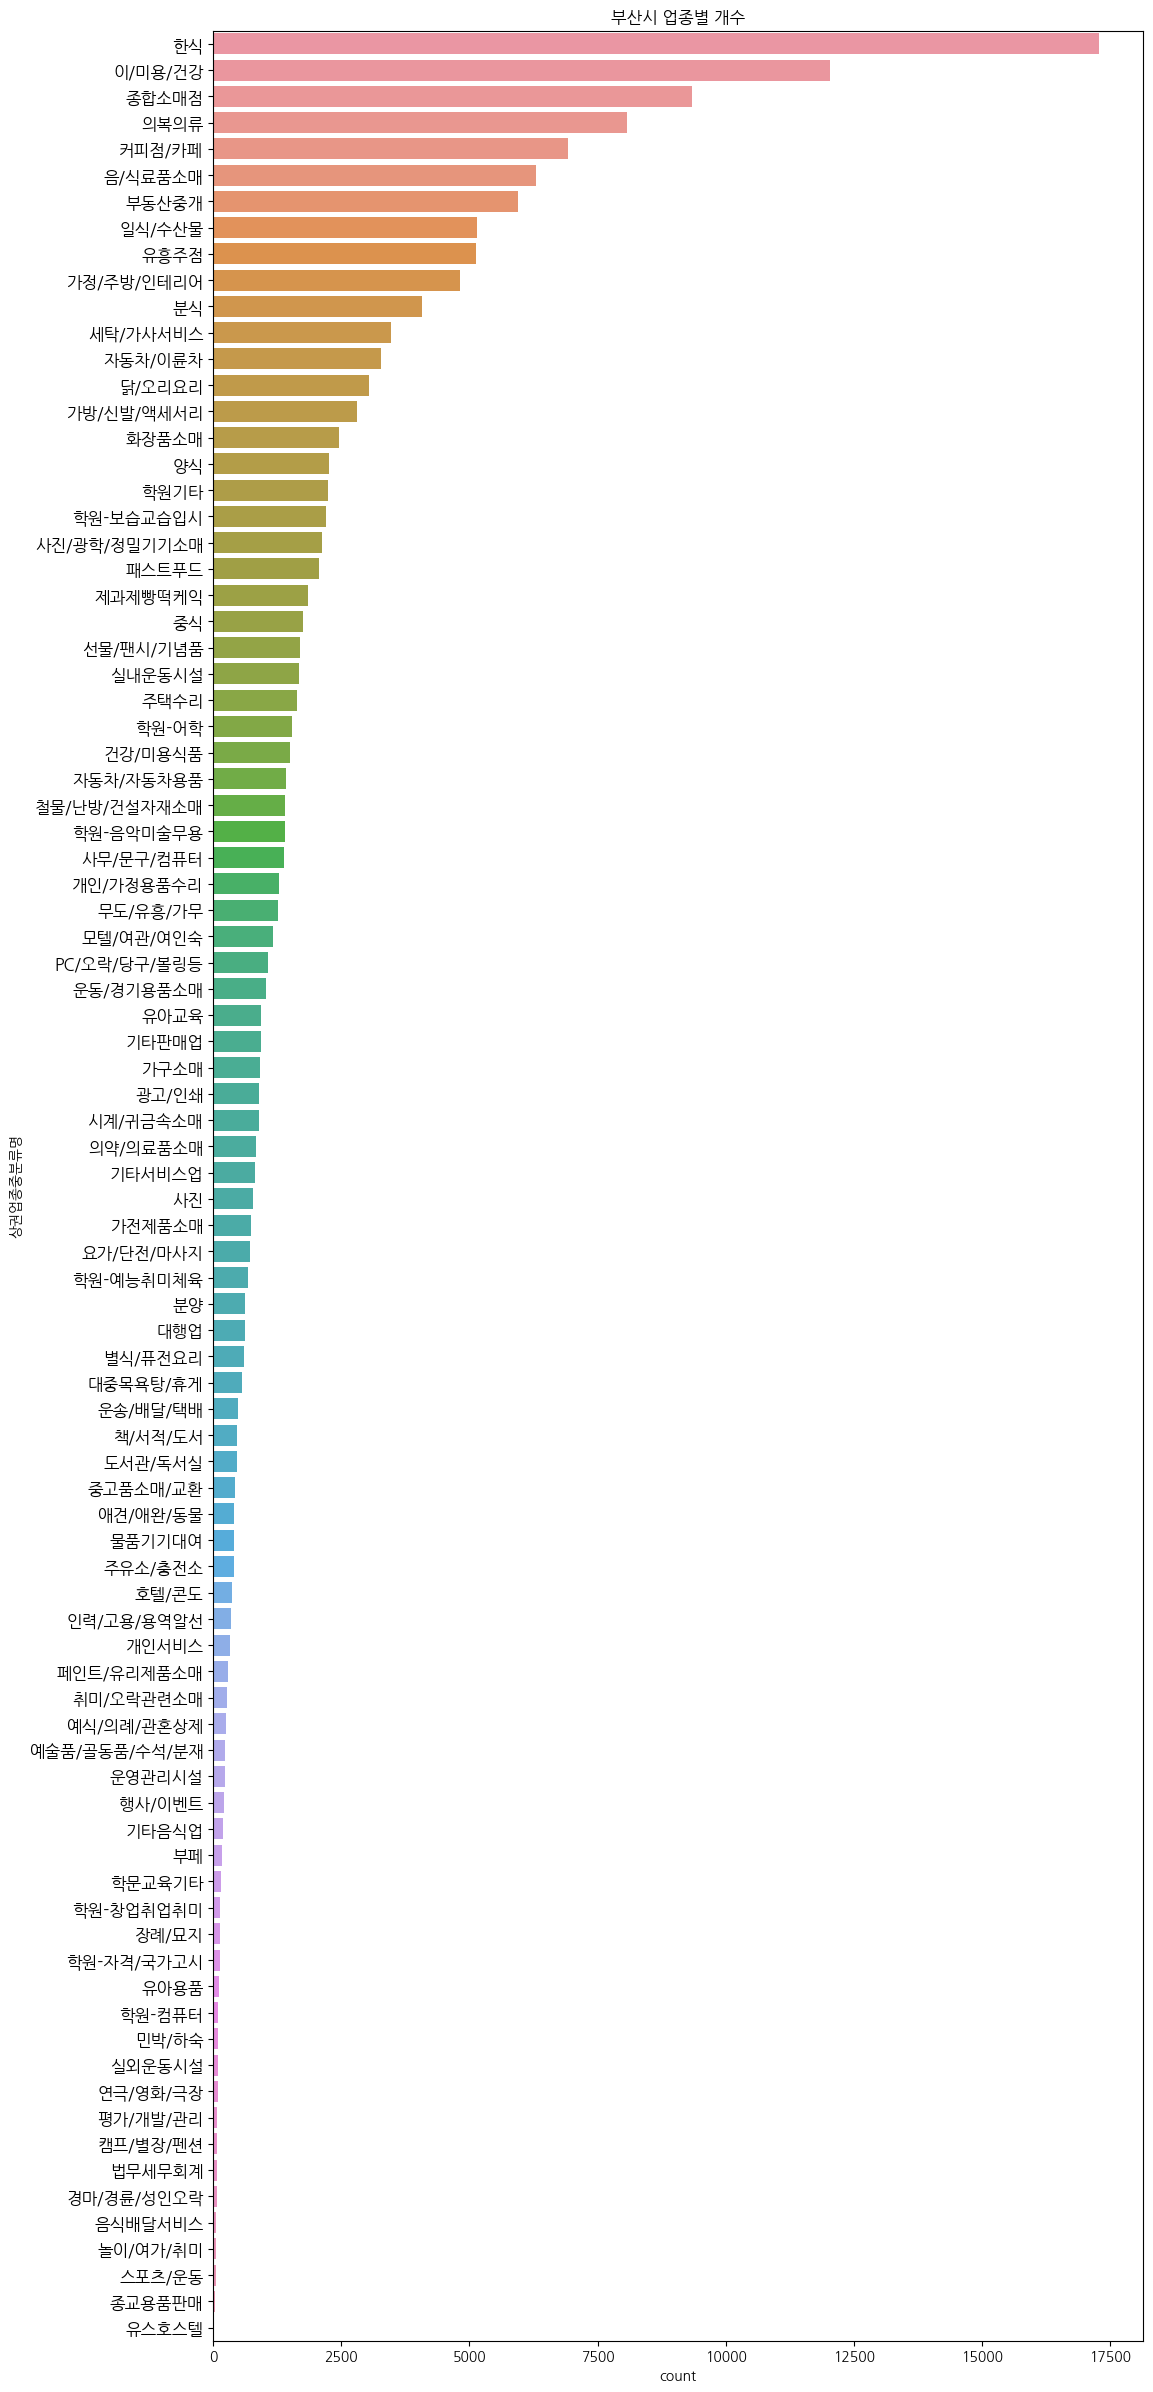

In [19]:
plt.figure(figsize=(12, 30))
sns.countplot(y=busan['상권업종중분류명'], order=busan['상권업종중분류명'].value_counts().index)
plt.yticks(fontsize=12)
plt.title('부산시 업종별 개수')
plt.show()

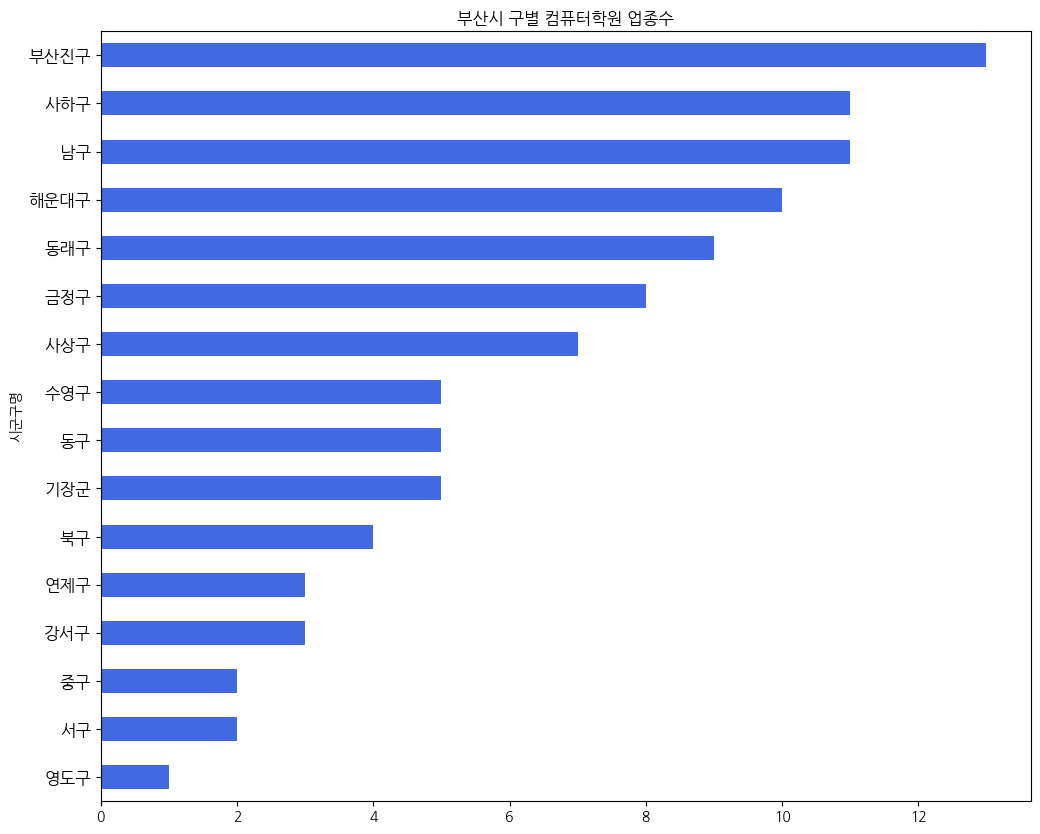

In [22]:
plt.figure(figsize=(12, 10))
busan.loc[busan['상권업종중분류명'] == '학원-컴퓨터'
         ].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(
    kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('부산시 구별 컴퓨터학원 업종수')
plt.show()

In [23]:
busan_com = busan.loc[busan['상권업종중분류명'] == '학원-컴퓨터']
busan_com

시군구명 상권업종대분류명 상권업종중분류명         위도          경도
1638      서구    학문/교육   학원-컴퓨터  35.096944  129.022213
3173      남구    학문/교육   학원-컴퓨터  35.135462  129.074245
4131     강서구    학문/교육   학원-컴퓨터  35.215050  128.982383
5178     사하구    학문/교육   학원-컴퓨터  35.050031  128.969978
5838     사하구    학문/교육   학원-컴퓨터  35.102975  128.982912
...      ...      ...      ...        ...         ...
138517   동래구    학문/교육   학원-컴퓨터  35.199942  129.064551
138619   수영구    학문/교육   학원-컴퓨터  35.153458  129.115649
140703  해운대구    학문/교육   학원-컴퓨터  35.157224  129.144841
141405    남구    학문/교육   학원-컴퓨터  35.115037  129.109103
143686   강서구    학문/교육   학원-컴퓨터  35.087747  128.880016

[99 rows x 5 columns]

In [25]:
# 컴퓨터학원 맵 클러스터 기능 활용
m = folium.Map(
    location=[35.17947948771729, 129.073820993845],
    zoom_start=12, 
    tiles='cartodbpositron'
)
folium.GeoJson(busan_geo, name='지역구').add_to(m)

marker_cluster = MarkerCluster().add_to(m)

for lat, long in zip(busan_com['위도'], busan_com['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="green")).add_to(marker_cluster)
    
m

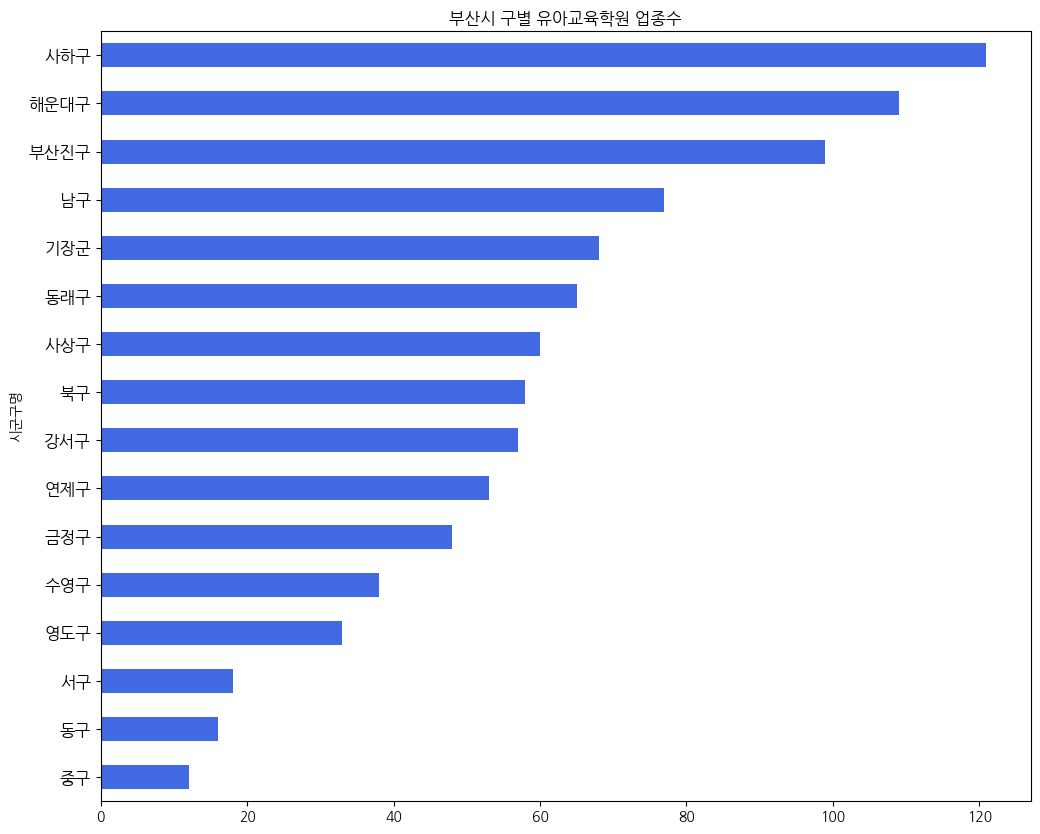

In [27]:
plt.figure(figsize=(12, 10))
busan.loc[busan['상권업종중분류명'] == '유아교육'
         ].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(
    kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('부산시 구별 유아교육학원 업종수')
plt.show()

In [26]:
busan_edu = busan.loc[busan['상권업종중분류명'] == '유아교육']
busan_edu

시군구명 상권업종대분류명 상권업종중분류명         위도          경도
168       남구    학문/교육     유아교육  35.116405  129.109385
561      사하구    학문/교육     유아교육  35.102909  128.972096
755       남구    학문/교육     유아교육  35.114747  129.080412
1161    해운대구    학문/교육     유아교육  35.170930  129.133716
1300     기장군    학문/교육     유아교육  35.334039  129.162498
...      ...      ...      ...        ...         ...
142733    동구    학문/교육     유아교육  35.116102  129.045139
142820    남구    학문/교육     유아교육  35.127243  129.109082
143495    남구    학문/교육     유아교육  35.124000  129.112768
144582   동래구    학문/교육     유아교육  35.196284  129.061385
145783   기장군    학문/교육     유아교육  35.238302  129.209767

[932 rows x 5 columns]

In [28]:
# 유아교육 업종의 맵 클러스터 기능 활용

m2 = folium.Map(
    location=[35.17947948771729, 129.073820993845],
    zoom_start=12, 
    tiles='cartodbpositron'
)
folium.GeoJson(busan_geo, name='지역구').add_to(m2)

marker_cluster = MarkerCluster().add_to(m2)

for lat, long in zip(busan_edu['위도'], busan_edu['경도']):
    folium.Marker([lat, long], icon = folium.Icon(color="red")).add_to(marker_cluster)
    
m2

In [29]:
busan_group_data = busan.loc[busan['상권업종중분류명'
                                  ] == '학원-컴퓨터'].groupby('시군구명')['상권업종중분류명'].count()
busan_group_data

시군구명
강서구      3
금정구      8
기장군      5
남구      11
동구       5
동래구      9
부산진구    13
북구       4
사상구      7
사하구     11
서구       2
수영구      5
연제구      3
영도구      1
중구       2
해운대구    10
Name: 상권업종중분류명, dtype: int64

In [31]:
m = folium.Map(
    location=[35.17947948771729, 129.073820993845],
    zoom_start=11, 
    tiles='cartodbpositron'
)
folium.GeoJson(
    busan_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=busan_geo,
             data=busan_group_data, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 컴퓨터학원 수"
            )
m

In [32]:
busan_group_data1 = busan.loc[busan['상권업종중분류명'
                                  ] == '유아교육'].groupby('시군구명')['상권업종중분류명'].count()
busan_group_data1

시군구명
강서구      57
금정구      48
기장군      68
남구       77
동구       16
동래구      65
부산진구     99
북구       58
사상구      60
사하구     121
서구       18
수영구      38
연제구      53
영도구      33
중구       12
해운대구    109
Name: 상권업종중분류명, dtype: int64

In [34]:
bins1 = list(busan_group_data1.quantile([0, 0.25, 0.5, 0.75, 1]))

m = folium.Map(
    location=[35.17947948771729, 129.073820993845],
    zoom_start=11, 
    tiles='cartodbpositron'
)

folium.GeoJson(
    busan_geo,
    name='지역구'
).add_to(m)

m.choropleth(geo_data=busan_geo,
             data=busan_group_data1, 
             fill_color='YlOrRd', # 색상 변경도 가능하다
             fill_opacity=0.5,
             line_opacity=0.2,
             key_on='properties.name',
             legend_name="지역구별 유아교육 업종 수", 
             bins1=bins1
            )
m